# CSCI 3220: Python for Data Science and AI

## Midterm Exam


#### ***Write the code in Jupyter notebook (ipynb file) with proper comments. 
#### ***Add proper citation if you take help from a different source (not from the textbook).
#### ***Rename the file with your student ID and submit it in Moodle.




In [1]:
#Name: Thien Tran
#Student ID: 2575712

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Read the data from the iris.csv file and create a datafarme. Print the first 6 rows of the dataframe.

In [2]:
frame = pd.read_csv("iris.csv")
frame[:6]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


## 2. Show the statistics about the iris dataset.

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Display the groupwise mean for each feature using the key as species.

In [4]:
gw_frame = pd.DataFrame(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                      index=['setosa', 'versicolor', 'virginica'])

gw_frame = gw_frame.T
gw_frame.setosa = frame[:50].mean()
gw_frame.versicolor = frame[50:100].mean()
gw_frame.virginica = frame[100:150].mean()
gw_frame = gw_frame.T

gw_frame

,sepal_length,sepal_width,petal_length,petal_width
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## 4. Plot a heatmap diagram for the correlation between the numerical features.

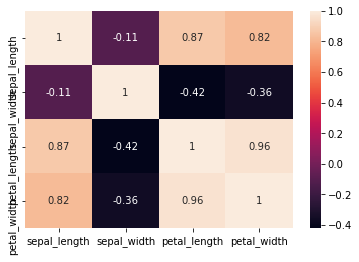

In [10]:
num_frame_columns = frame.columns[frame.dtypes != object] #get columns whose dtype is not an object

num_frame = frame[num_frame_columns]

sns.heatmap(num_frame.corr(), annot=True)
plt.yticks(rotation = 90)
plt.show()

## 5. Display the pairwise relationship in the iris dataset using the seaborn library.

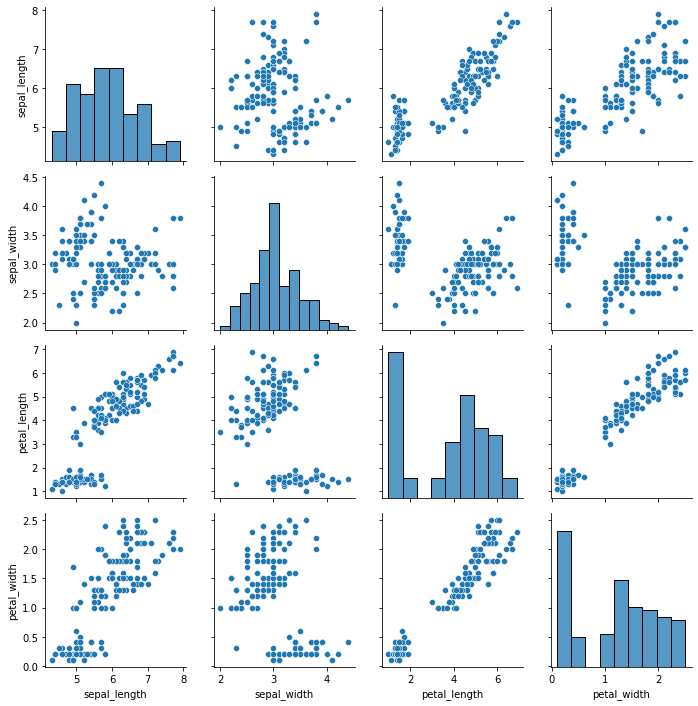

In [6]:
#Citation: learned how to use pairwise relationship from the seaborn Pairgrid documentation
#Link: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

num_frame_columns = frame.columns[frame.dtypes != object]
num_frame = frame[num_frame_columns]

grid = sns.PairGrid(num_frame)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)

## 6. Do you have any observations for the petal_length and petal_width features from the above figures?

#### Answer:

Yes. I noticed that there is a strong linear correlation between the length of the petal and the width.

## 7. Count the number of entries in the dataset for each type of species.

In [7]:
frame.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

## 8. Convert the categorical values in the species column into numerical values using the one-hot encoding technique. (Do not use any library method for one-hot encoding)

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoded_frame = frame.copy()

#Initialize relevant columns with default 0
encoded_frame["setosa"] = 0
encoded_frame["versicolor"] = 0
encoded_frame["virginica"] = 0


#Encoded each individual frame (avoids problem that prevents modifying frame values directly)
setosa_frame = encoded_frame[encoded_frame["species"] == "setosa"].copy()
setosa_frame["setosa"] = 1

versicolor_frame = encoded_frame[encoded_frame["species"] == "versicolor"].copy()
versicolor_frame["versicolor"] = 1

virginica_frame = encoded_frame[encoded_frame["species"] == "virginica"].copy()
virginica_frame["virginica"] = 1

#Concatenate the relevant frames and drop species since it's no longer needed
result_frame = pd.concat([setosa_frame,versicolor_frame,virginica_frame])
result_frame = result_frame.drop("species", axis=1)
result_frame

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 9. Save the modified dataframe into processed_iris_dataset.csv file.

In [9]:
#Citation: Learned how to save to csv from pandas documentation
#Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

result_frame.to_csv("processed_iris_dataset.csv")